# Run Best Models and Evaluate Results

#### This notebook runs the best model as determined by the COVID_models notebook and evaluates the results.  It uses as inputs the features and targets csv files and outputs a csv file with the best model's predictions for each census block group in Chicago.

In [1]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt

### Load features

Change the filepath to a location on your local machine

In [2]:
df_features_census = pd.read_csv('../data/census_processed.csv', dtype={'geo_12': 'str'})
df_features_census["geo_12"] = df_features_census["GEO_ID"].map(lambda x: str(x)[-12:])
df_features_census.drop(["GEO_ID"], axis=1, inplace=True)

Change the filepath to a location on your local machine

In [3]:
df_features_places = pd.read_csv('../data/places_count_by_census_block.csv', dtype={'geo_12': 'str'})

In [4]:
df_features = df_features_places.merge(df_features_census, on='geo_12')

In [5]:
df_features.head()

,geo_12,automotive_repair_and_maintenance,child_day_care_services,elementary_and_secondary_schools,grocery_stores,health_and_personal_care_stores,"museums,_historical_sites,_and_similar_institutions",offices_of_physicians,other_amusement_and_recreation_industries,religious_organizations,...,Percent_HS,Percent_SomeCollege,Percent_Bach,Percent_Grad,Percent_No_vehicals,Percent_Received_SNAP,Percent_Men_Usually_Fulltime_Employed,Percent_Women_Usually_Fulltime_Employed,Percent_No_Internet_Access,Percent_Computing_Device
0,170310101001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.168511,0.255138,0.289598,0.179260,0.344589,0.186960,0.885906,0.382653,0.217742,0.782258
1,170310101002,0.0,1.0,1.0,0.0,0.0,3.0,1.0,2.0,1.0,...,0.168511,0.255138,0.289598,0.179260,0.344589,0.186960,0.507064,0.452071,0.330517,0.829989
2,170310101003,0.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,1.0,...,0.168511,0.255138,0.289598,0.179260,0.344589,0.186960,0.765318,0.663338,0.074041,0.950045
3,170310102011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.246110,0.246314,0.193898,0.114251,0.140014,0.316592,0.559184,0.437107,0.105030,0.921598
4,170310102012,1.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.246110,0.246314,0.193898,0.114251,0.140014,0.316592,0.495495,0.320800,0.202247,0.822868


In [6]:
df_features.columns

Index(['geo_12', 'automotive_repair_and_maintenance',
       'child_day_care_services', 'elementary_and_secondary_schools',
       'grocery_stores', 'health_and_personal_care_stores',
       'museums,_historical_sites,_and_similar_institutions',
       'offices_of_physicians', 'other_amusement_and_recreation_industries',
       'religious_organizations', 'restaurants_and_other_eating_places',
       'Median_Income', 'Median_Age', 'Percent_NonCitizen',
       'Percent_SpeakEngl_Poorly', 'Percent_less_than_HS', 'Percent_HS',
       'Percent_SomeCollege', 'Percent_Bach', 'Percent_Grad',
       'Percent_No_vehicals', 'Percent_Received_SNAP',
       'Percent_Men_Usually_Fulltime_Employed',
       'Percent_Women_Usually_Fulltime_Employed', 'Percent_No_Internet_Access',
       'Percent_Computing_Device'],
      dtype='object')

## Targets - diff data Feb-March/April 2020
### Load targets

In [7]:
df_targets_diff = pd.read_csv('../data/COVID_mobility_targets_adjusted.csv', dtype={'geo_12': 'str'})
df_targets_diff.head()

,geo_12,Week,fraction_of_devices_home_adj,fraction_of_devices_work_adj,avg_time_away_all_adj,avg_time_away_leave_adj
0,170310101001,13,-0.109290,0.025002,-2.793329,-5.682080
1,170310101001,14,-0.275245,0.041250,1.244839,-1.078737
2,170310101001,15,-0.351214,0.014606,1.389693,-0.882231
3,170310101001,16,-0.412453,0.003080,3.517668,2.032444
4,170310101001,17,-0.236143,0.021375,1.849506,0.577840


### Create dataframe

In [8]:
df_diff = df_features.merge(df_targets_diff, on='geo_12')
df_diff.head(10)

,geo_12,automotive_repair_and_maintenance,child_day_care_services,elementary_and_secondary_schools,grocery_stores,health_and_personal_care_stores,"museums,_historical_sites,_and_similar_institutions",offices_of_physicians,other_amusement_and_recreation_industries,religious_organizations,...,Percent_Received_SNAP,Percent_Men_Usually_Fulltime_Employed,Percent_Women_Usually_Fulltime_Employed,Percent_No_Internet_Access,Percent_Computing_Device,Week,fraction_of_devices_home_adj,fraction_of_devices_work_adj,avg_time_away_all_adj,avg_time_away_leave_adj
0,170310101001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.18696,0.885906,0.382653,0.217742,0.782258,13,-0.109290,0.025002,-2.793329,-5.682080
1,170310101001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.18696,0.885906,0.382653,0.217742,0.782258,14,-0.275245,0.041250,1.244839,-1.078737
2,170310101001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.18696,0.885906,0.382653,0.217742,0.782258,15,-0.351214,0.014606,1.389693,-0.882231
3,170310101001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.18696,0.885906,0.382653,0.217742,0.782258,16,-0.412453,0.003080,3.517668,2.032444
4,170310101001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.18696,0.885906,0.382653,0.217742,0.782258,17,-0.236143,0.021375,1.849506,0.577840
5,170310101002,0.0,1.0,1.0,0.0,0.0,3.0,1.0,2.0,1.0,...,0.18696,0.507064,0.452071,0.330517,0.829989,13,-0.179907,0.099824,0.465042,-0.755220
6,170310101002,0.0,1.0,1.0,0.0,0.0,3.0,1.0,2.0,1.0,...,0.18696,0.507064,0.452071,0.330517,0.829989,14,-0.195003,0.111091,0.454175,-1.021637
7,170310101002,0.0,1.0,1.0,0.0,0.0,3.0,1.0,2.0,1.0,...,0.18696,0.507064,0.452071,0.330517,0.829989,15,-0.220504,0.113188,0.318956,-1.740246
8,170310101002,0.0,1.0,1.0,0.0,0.0,3.0,1.0,2.0,1.0,...,0.18696,0.507064,0.452071,0.330517,0.829989,16,-0.224676,0.116625,0.570743,-1.218873
9,170310101002,0.0,1.0,1.0,0.0,0.0,3.0,1.0,2.0,1.0,...,0.18696,0.507064,0.452071,0.330517,0.829989,17,-0.190584,0.109911,-0.068496,-2.148397


### Split into training and testing

In [9]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_diff, test_size=0.2)

### Impute missing

In [10]:
train['Median_Income'].fillna((train['Median_Income'].median()), inplace=True)
test['Median_Income'].fillna((train['Median_Income'].median()), inplace=True)

/Users/amandawhaley/anaconda3/envs/ML_CAPP/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [11]:
train.dropna(inplace=True)
test.dropna(inplace=True)

/Users/amandawhaley/anaconda3/envs/ML_CAPP/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/amandawhaley/anaconda3/envs/ML_CAPP/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
print('{} observations in the training set.'.format(len(train)))
print('{} observations in the test set.'.format(len(test)))

8725 observations in the training set.
2180 observations in the test set.


## Random Forest Model

In [13]:
from sklearn.ensemble import RandomForestRegressor

### Features

In [14]:
features_cols = list(df_features.columns)
features_cols.remove('geo_12')

features_train = train[features_cols]
features_test = test[features_cols]

fodh_target_train, fodh_target_test = train['fraction_of_devices_home_adj'], test['fraction_of_devices_home_adj']
fodw_target_train, fodw_target_test = train['fraction_of_devices_work_adj'], test['fraction_of_devices_work_adj']

ataa_target_train, ataa_target_test = train['avg_time_away_all_adj'], test['avg_time_away_all_adj']
atal_target_train, atal_target_test = train['avg_time_away_leave_adj'], test['avg_time_away_leave_adj']

In [15]:
features_cols

['automotive_repair_and_maintenance',
 'child_day_care_services',
 'elementary_and_secondary_schools',
 'grocery_stores',
 'health_and_personal_care_stores',
 'museums,_historical_sites,_and_similar_institutions',
 'offices_of_physicians',
 'other_amusement_and_recreation_industries',
 'religious_organizations',
 'restaurants_and_other_eating_places',
 'Median_Income',
 'Median_Age',
 'Percent_NonCitizen',
 'Percent_SpeakEngl_Poorly',
 'Percent_less_than_HS',
 'Percent_HS',
 'Percent_SomeCollege',
 'Percent_Bach',
 'Percent_Grad',
 'Percent_No_vehicals',
 'Percent_Received_SNAP',
 'Percent_Men_Usually_Fulltime_Employed',
 'Percent_Women_Usually_Fulltime_Employed',
 'Percent_No_Internet_Access',
 'Percent_Computing_Device']

## Target: Reduction in Fraction of Devices at Home

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Model hyperparameters determined in a separate notebook.
rf_fodh = RandomForestRegressor(n_jobs=-1, 
                           n_estimators=205,
                           min_samples_split=7,
                           min_samples_leaf=2,
                           bootstrap=True
                            )
model_fodh = rf_fodh.fit(features_train,fodh_target_train)

#### Root Mean Squared Error

In [17]:
fodh_y_pred=rf_fodh.predict(features_test)
print("RMSE: ", np.sqrt(mean_squared_error(fodh_y_pred, fodh_target_test)))

RMSE:  0.04861602650806526


#### One to one plot

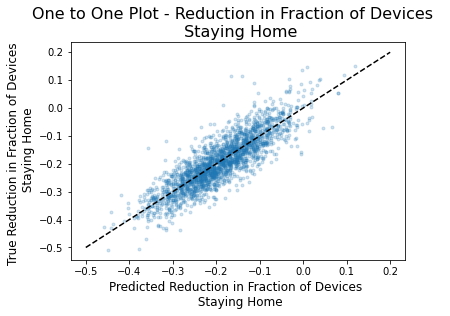

In [18]:
from matplotlib import pyplot as plt
plt.plot(fodh_y_pred, fodh_target_test, '.', alpha = 0.2)
plt.ylabel('True Reduction in Fraction of Devices \n Staying Home', fontsize=12)
plt.xlabel('Predicted Reduction in Fraction of Devices \n Staying Home', fontsize=12)
plt.title('One to One Plot - Reduction in Fraction of Devices  \n Staying Home', fontsize=16)
line_x, line_y = [-0.5,0.2], [-0.5,0.2]
line_cutoff = [0,0]
plt.plot(line_x,line_y,'k--')
#plt.plot(line_x,line_cutoff,'r--')
#plt.plot(line_cutoff, line_y, 'g--')
plt.show()

#### Residual Plot

Text(0, 0.5, 'Model Residual (Predicted - True)')

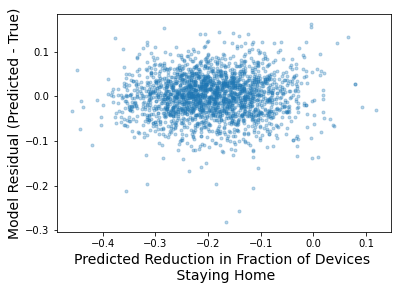

In [19]:
residuals_fodh = fodh_y_pred - fodh_target_test
plt.plot(fodh_y_pred, residuals_fodh, '.', alpha=0.3)
plt.xlabel('Predicted Reduction in Fraction of Devices \n Staying Home', fontsize=14)
plt.ylabel('Model Residual (Predicted - True)', fontsize=14)

## Target: Fraction of Devices with Work Behavior

In [20]:
#Model hyperparameters determined in a separate notebook.
rf_fodw = RandomForestRegressor(n_jobs=-1, 
                                   n_estimators=400,
                                   min_samples_split=7,
                                   min_samples_leaf=2,
                                   max_depth=120,
                                   bootstrap=True
                            )
t0 = time.time()
model_fodw = rf_fodw.fit(features_train,fodw_target_train)
print('train time: ', time.time()-t0)

train time:  11.361799955368042


#### Root Mean Squared Error

In [21]:
fodw_y_pred=rf_fodw.predict(features_test)
fodw_rmse = np.sqrt(mean_squared_error(fodw_y_pred, fodw_target_test))
print("RMSE: ", fodw_rmse)

RMSE:  0.02078527428416631


#### One to one plot

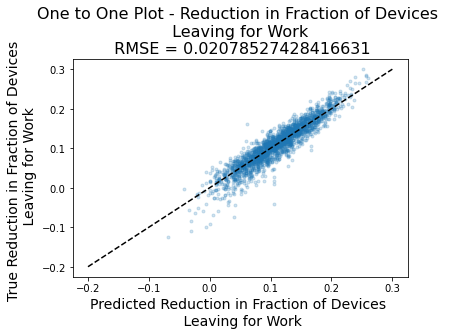

In [22]:
plt.plot(fodw_y_pred, fodw_target_test, '.', alpha = 0.2)
plt.ylabel('True Reduction in Fraction of Devices \n Leaving for Work', fontsize=14)
plt.xlabel('Predicted Reduction in Fraction of Devices \n Leaving for Work', fontsize=14)
plt.title('One to One Plot - Reduction in Fraction of Devices \n Leaving for Work \n RMSE = {}'.format(fodw_rmse), 
          fontsize=16)
line_x, line_y = [-0.2,0.3], [-0.2,0.3]
line_cutoff = [0.05,0.05]
plt.plot(line_x,line_y,'k--')
#plt.plot(line_x,line_cutoff,'r--')
#plt.plot(line_cutoff, line_y, 'g--')
plt.show()

In [23]:
feature_importances_fodw = pd.DataFrame(rf_fodw.feature_importances_, index = features_cols,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances_fodw)

                                                    importance
Percent_Received_SNAP                                 0.181688
Percent_No_vehicals                                   0.089681
Median_Income                                         0.070938
Percent_Men_Usually_Fulltime_Employed                 0.065242
Percent_Women_Usually_Fulltime_Employed               0.063517
Median_Age                                            0.060914
Percent_SpeakEngl_Poorly                              0.056478
Percent_No_Internet_Access                            0.052442
Percent_SomeCollege                                   0.043617
Percent_Computing_Device                              0.041454
Percent_HS                                            0.034315
Percent_Grad                                          0.034250
Percent_NonCitizen                                    0.032905
Percent_Bach                                          0.031918
Percent_less_than_HS                                  0

#### Residual Plot

Text(0, 0.5, 'Model Residual (Predicted - True)')

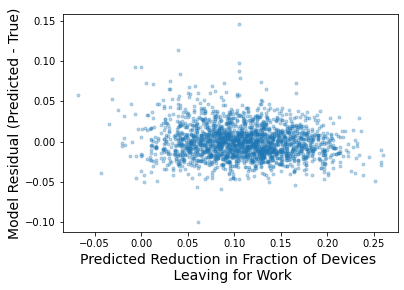

In [24]:
residuals_fodw = fodw_y_pred - fodw_target_test
plt.plot(fodw_y_pred, residuals_fodw, '.', alpha=0.3)
plt.xlabel('Predicted Reduction in Fraction of Devices \n Leaving for Work', fontsize=14)
plt.ylabel('Model Residual (Predicted - True)', fontsize=14)

## Target: Average Time Away From Home (All)

In [25]:
#Model hyperparameters determined in a separate notebook.
rf_ataa = RandomForestRegressor(n_jobs=-1, 
                                    n_estimators=120,
                                    min_samples_split=4,
                                    min_samples_leaf=2,
                                    bootstrap=True
                            )
t0 = time.time()
model_ataa = rf_ataa.fit(features_train,ataa_target_train)
print('train time: ', time.time()-t0)

train time:  4.198340892791748


#### Root Mean Squared Error

In [26]:
ataa_y_pred=rf_ataa.predict(features_test)
ataa_rmse = np.sqrt(mean_squared_error(ataa_y_pred, ataa_target_test))
print("RMSE: ", ataa_rmse)

RMSE:  0.7054011151924733


#### One to one plot

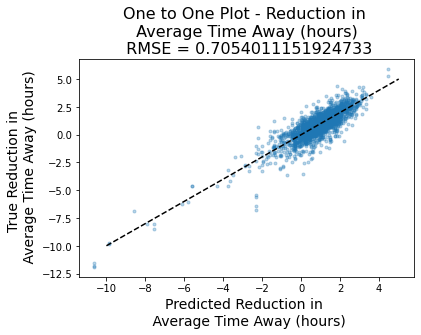

In [27]:
plt.plot(ataa_y_pred, ataa_target_test, '.', alpha=0.3)
plt.ylabel('True Reduction in \n Average Time Away (hours)', fontsize=14)
plt.xlabel('Predicted Reduction in \n Average Time Away (hours)', fontsize=14)
plt.title('One to One Plot - Reduction in \n Average Time Away (hours) \n RMSE = {}'.format(ataa_rmse), 
          fontsize=16)
line_x, line_y = [-10,5], [-10,5]
line_cutoff = [0,0]
plt.plot(line_x,line_y,'k--')
#plt.plot(line_x,line_cutoff,'r--')
#plt.plot(line_cutoff, line_y, 'g--')
plt.show()

In [28]:
feature_importances_ataa = pd.DataFrame(rf_ataa.feature_importances_, index = features_cols,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances_ataa)

                                                    importance
Median_Age                                            0.149715
Percent_No_vehicals                                   0.146417
Percent_No_Internet_Access                            0.070176
Median_Income                                         0.065116
Percent_Men_Usually_Fulltime_Employed                 0.058839
Percent_Women_Usually_Fulltime_Employed               0.055871
Percent_Grad                                          0.055807
Percent_less_than_HS                                  0.051755
Percent_HS                                            0.050892
Percent_Computing_Device                              0.039830
Percent_SpeakEngl_Poorly                              0.031867
Percent_NonCitizen                                    0.029233
Percent_SomeCollege                                   0.029044
Percent_Bach                                          0.028897
restaurants_and_other_eating_places                   0

#### Residual Plot

Text(0, 0.5, 'Model Residual (Predicted - True)')

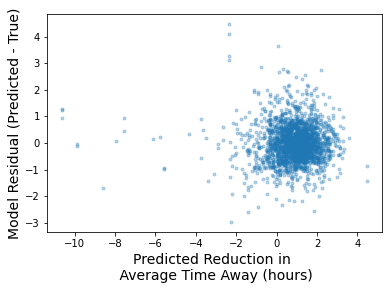

In [29]:
residuals_ataa = ataa_y_pred - ataa_target_test
plt.plot(ataa_y_pred, residuals_ataa, '.', alpha=0.3)
plt.xlabel('Predicted Reduction in \n Average Time Away (hours)', fontsize=14)
plt.ylabel('Model Residual (Predicted - True)', fontsize=14)

## Target: Average Time Away From Home (Leavers)

In [30]:
#Model hyperparameters determined in a separate notebook.
rf_atal = RandomForestRegressor(n_jobs=-1, 
                                    n_estimators=350,
                                    min_samples_leaf=2,
                                    max_depth=140,
                                    bootstrap=True
                            )
model_atal = rf_atal.fit(features_train,atal_target_train)

#### Root Mean Squared Error

In [31]:
atal_y_pred=rf_atal.predict(features_test)
print("RMSE: ", np.sqrt(mean_squared_error(atal_y_pred, atal_target_test)))

RMSE:  1.0854661682428215


#### One to one plot

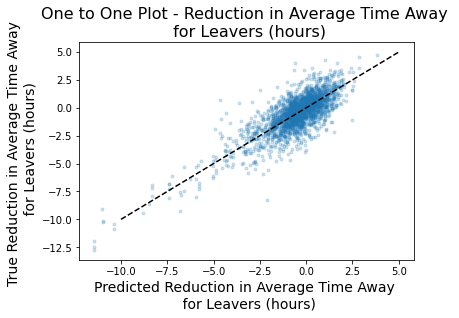

In [32]:
plt.plot(atal_y_pred, atal_target_test, '.', alpha = 0.2)
plt.ylabel('True Reduction in Average Time Away \n for Leavers (hours)', fontsize=14)
plt.xlabel('Predicted Reduction in Average Time Away \n for Leavers (hours)', fontsize=14)
plt.title('One to One Plot - Reduction in Average Time Away \n for Leavers (hours)', fontsize=16)
line_x, line_y = [-10,5], [-10,5]
line_cutoff = [0,0]
plt.plot(line_x,line_y,'k--')
#plt.plot(line_x,line_cutoff,'r--')
#plt.plot(line_cutoff, line_y, 'g--')
plt.show()

#### Residual Plot

Text(0, 0.5, 'Model Residual (Predicted - True)')

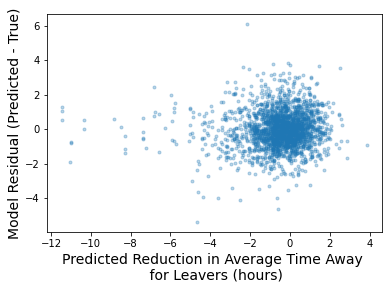

In [33]:
residuals_atal = atal_y_pred - atal_target_test
plt.plot(atal_y_pred, residuals_atal, '.', alpha=0.3)
plt.xlabel('Predicted Reduction in Average Time Away \n for Leavers (hours)', fontsize=14)
plt.ylabel('Model Residual (Predicted - True)', fontsize=14)

### Create a dataframe with one row for each census block group and get a prediction from the model for each block group, assign "intervention" status.  

In [34]:
df_all = df_diff.drop(['Week'], axis=1).groupby('geo_12').mean().reset_index()
df_all['Median_Income'].fillna((df_all['Median_Income'].median()), inplace=True)
df_all.dropna(inplace=True)

In [35]:
ataa_y_pred_all=rf_ataa.predict(df_all[features_cols])
fodw_y_pred_all = rf_fodw.predict(df_all[features_cols])
df_all['pred_fraction_of_devices_work_adj'] = fodw_y_pred_all
df_all['pred_avg_time_away_all_adj'] = ataa_y_pred_all

In [36]:
df_all['intervention_fodw'] = 0
df_all.loc[df_all['pred_fraction_of_devices_work_adj'] < 0.1, 'intervention_fodw'] = 1
df_all['intervention_ataa'] = 0
df_all.loc[df_all['pred_avg_time_away_all_adj'] < 1, 'intervention_ataa'] = 1
df_all.head()

,geo_12,automotive_repair_and_maintenance,child_day_care_services,elementary_and_secondary_schools,grocery_stores,health_and_personal_care_stores,"museums,_historical_sites,_and_similar_institutions",offices_of_physicians,other_amusement_and_recreation_industries,religious_organizations,...,Percent_No_Internet_Access,Percent_Computing_Device,fraction_of_devices_home_adj,fraction_of_devices_work_adj,avg_time_away_all_adj,avg_time_away_leave_adj,pred_fraction_of_devices_work_adj,pred_avg_time_away_all_adj,intervention_fodw,intervention_ataa
0,170310101001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.217742,0.782258,-0.276869,0.021063,1.041675,-1.006553,0.023974,1.011627,1,0
1,170310101002,0.0,1.0,1.0,0.0,0.0,3.0,1.0,2.0,1.0,...,0.330517,0.829989,-0.202135,0.110128,0.348084,-1.376875,0.110039,0.357546,0,1
2,170310101003,0.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,1.0,...,0.074041,0.950045,-0.217261,0.130307,-0.335746,-3.106318,0.121062,-0.350564,0,1
3,170310102011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.105030,0.921598,-0.267492,0.152968,1.797194,0.359257,0.150931,1.811033,0,0
4,170310102012,1.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.202247,0.822868,-0.180690,0.148699,0.328373,-1.291540,0.145359,0.519518,0,1


In [37]:
df_all.to_csv('COVID_mobility_predictions.csv', header=True, index=False)

## Analysis

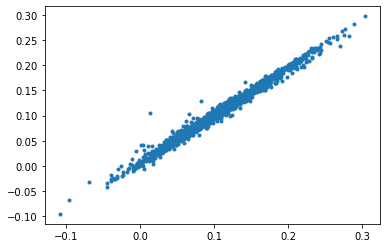

In [38]:
plt.plot(df_all['fraction_of_devices_work_adj'], df_all['pred_fraction_of_devices_work_adj'], '.')

### Fraction of Devices Exhibiting Work Behavior

In [39]:
import_cols_fodw = ['Percent_Received_SNAP', 'Percent_No_vehicals', 'Median_Income', 
                    'Percent_Men_Usually_Fulltime_Employed', 'Percent_Women_Usually_Fulltime_Employed',
                    'Median_Age', 'Percent_SpeakEngl_Poorly', 'Percent_No_Internet_Access', 
                    'Percent_SomeCollege', 'Percent_Computing_Device', 'Percent_Grad', 
                    'fraction_of_devices_work_adj', 'pred_fraction_of_devices_work_adj',
                    'intervention_fodw']
df_import_fodw = df_all[import_cols_fodw].copy()
df_import_fodw.head()

,Percent_Received_SNAP,Percent_No_vehicals,Median_Income,Percent_Men_Usually_Fulltime_Employed,Percent_Women_Usually_Fulltime_Employed,Median_Age,Percent_SpeakEngl_Poorly,Percent_No_Internet_Access,Percent_SomeCollege,Percent_Computing_Device,Percent_Grad,fraction_of_devices_work_adj,pred_fraction_of_devices_work_adj,intervention_fodw
0,0.186960,0.344589,52000.0,0.885906,0.382653,52.7,0.053891,0.217742,0.255138,0.782258,0.179260,0.021063,0.023974,1
1,0.186960,0.344589,21222.0,0.507064,0.452071,31.4,0.053891,0.330517,0.255138,0.829989,0.179260,0.110128,0.110039,0
2,0.186960,0.344589,64517.0,0.765318,0.663338,38.8,0.053891,0.074041,0.255138,0.950045,0.179260,0.130307,0.121062,0
3,0.316592,0.140014,44239.0,0.559184,0.437107,39.0,0.229913,0.105030,0.246314,0.921598,0.114251,0.152968,0.150931,0
4,0.316592,0.140014,31194.0,0.495495,0.320800,34.3,0.229913,0.202247,0.246314,0.822868,0.114251,0.148699,0.145359,0


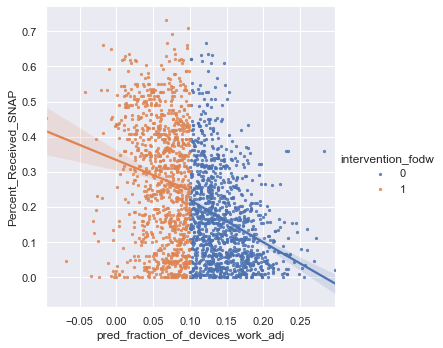

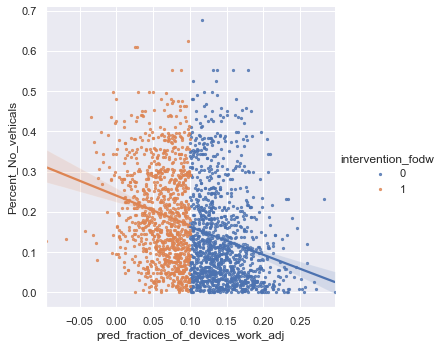

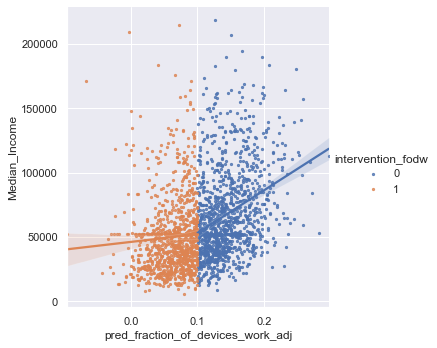

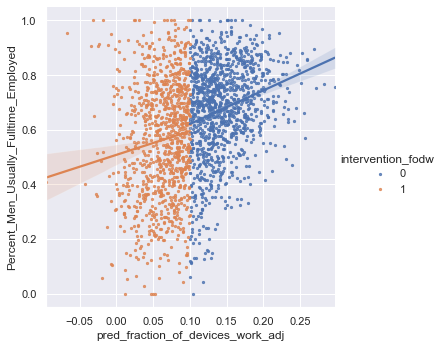

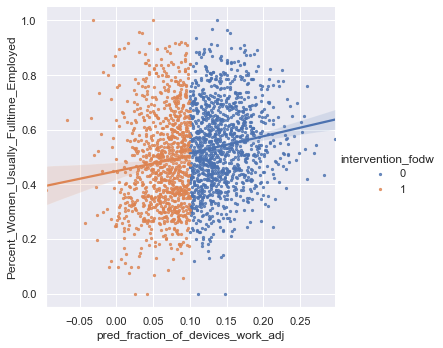

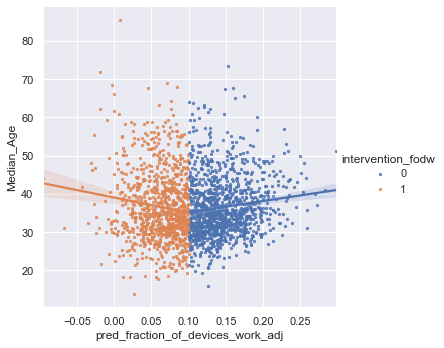

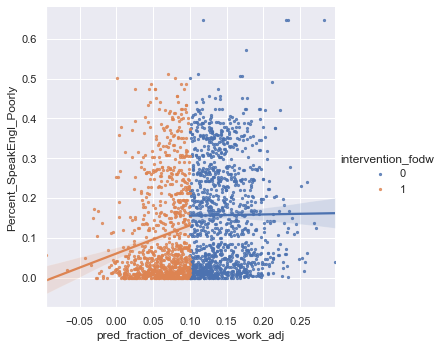

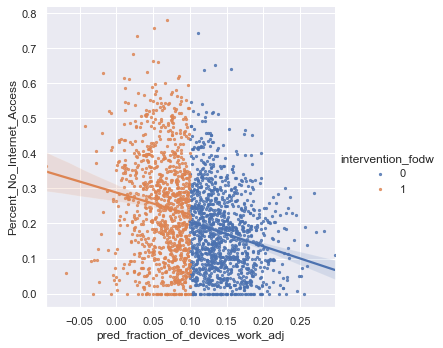

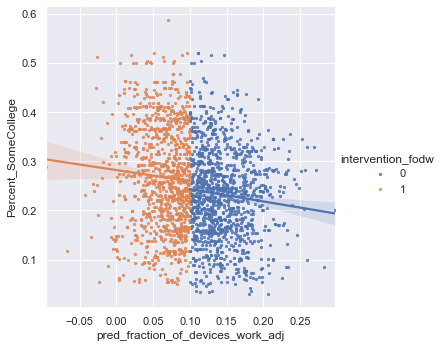

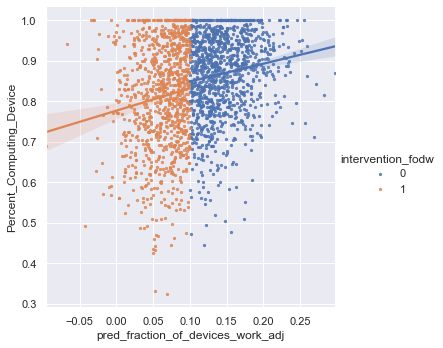

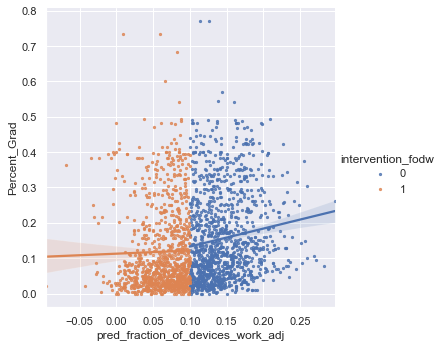

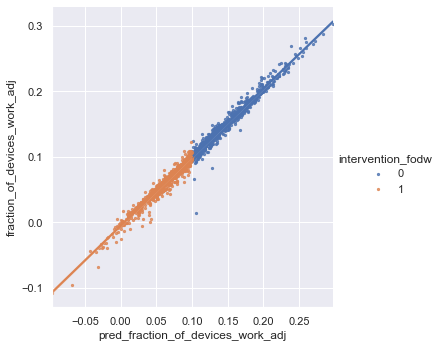

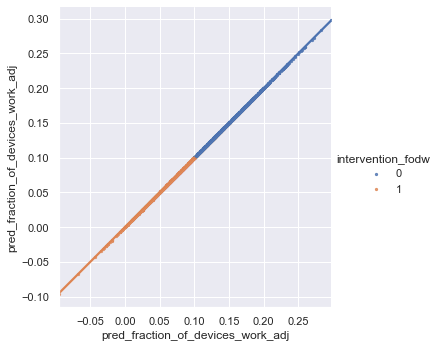

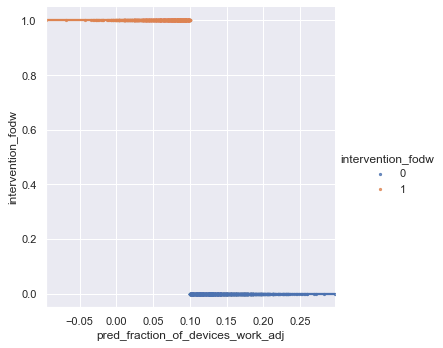

In [40]:
sns.set(rc={'figure.figsize':(11, 4)})

for col in import_cols_fodw:
    sns.lmplot(x="pred_fraction_of_devices_work_adj", y=col, data=df_import_fodw, fit_reg=True, 
           hue='intervention_fodw', scatter_kws={"s": 5})

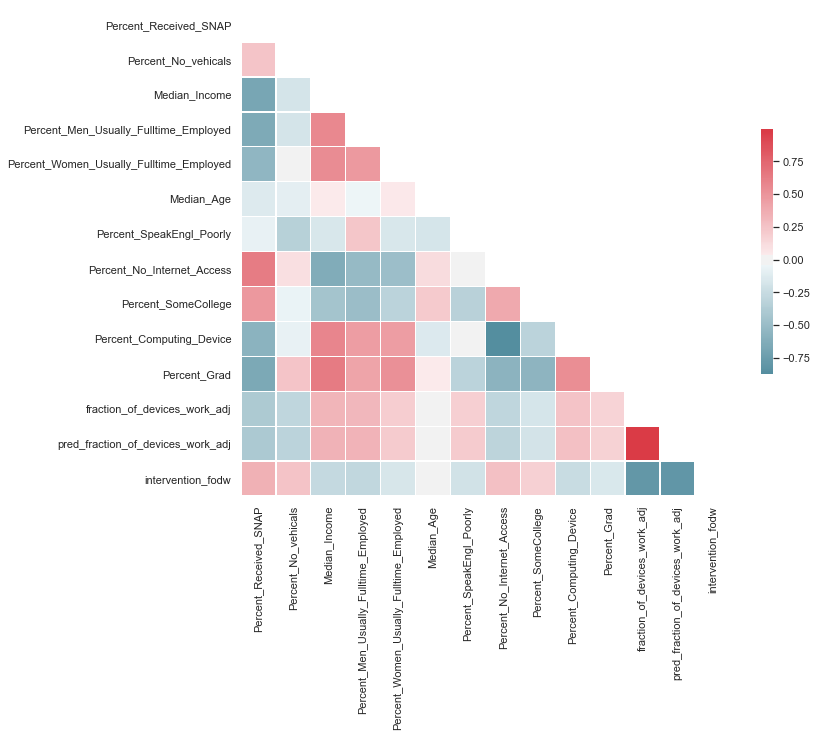

In [41]:
sns.set(style="white")

# Compute the correlation matrix
corr = df_import_fodw.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


985


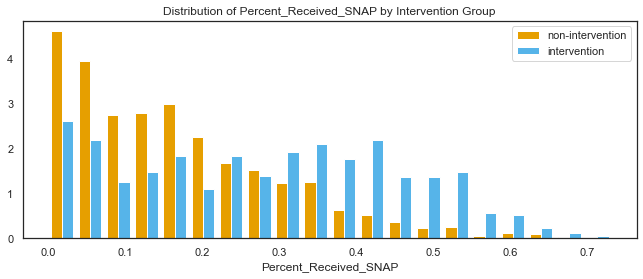

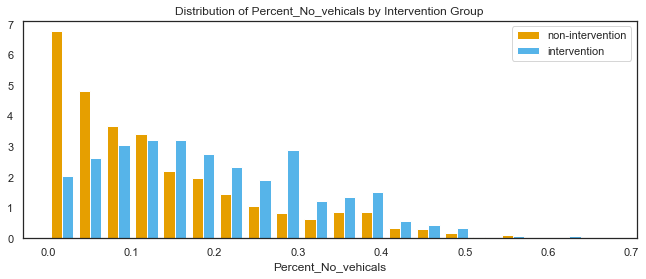

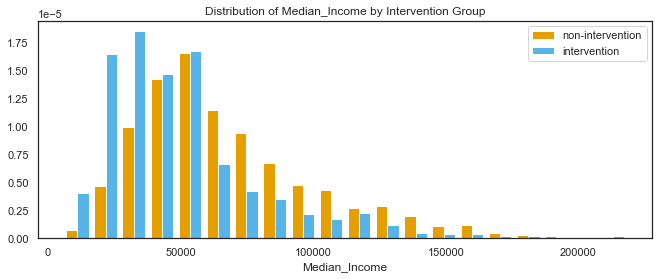

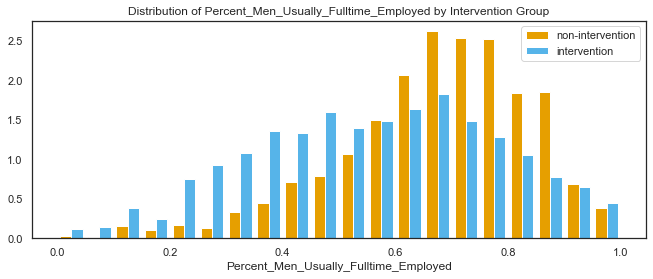

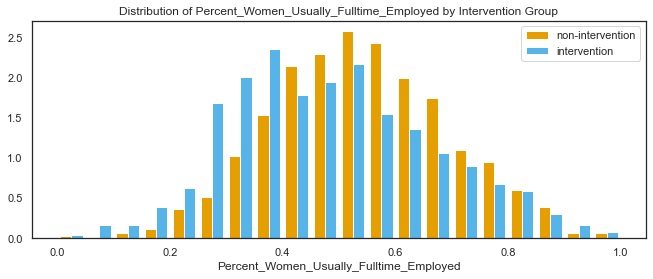

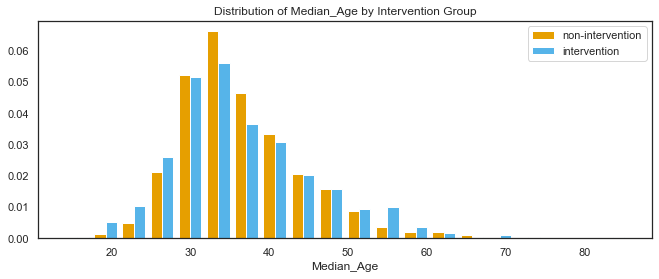

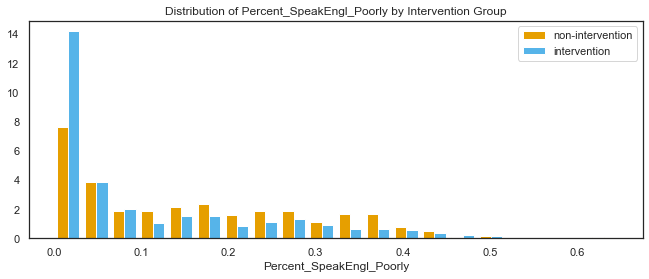

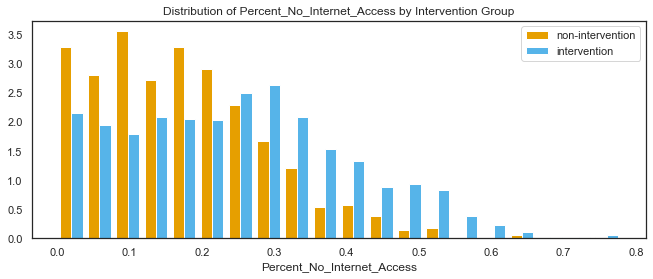

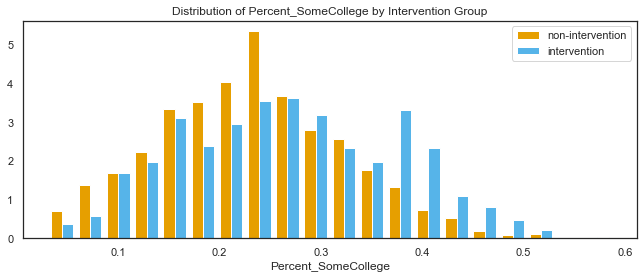

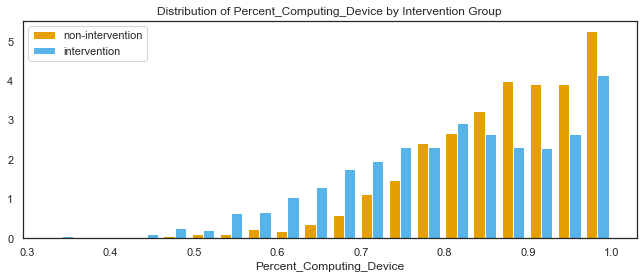

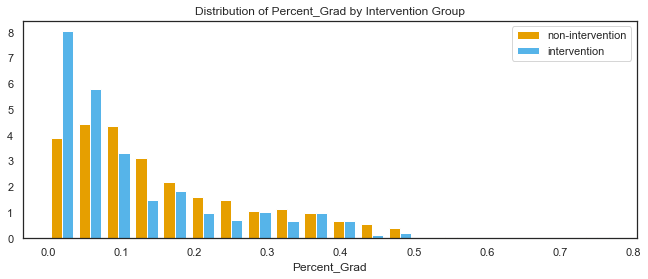

In [42]:
ct_intervention = len(df_import_fodw.loc[df_import_fodw['intervention_fodw']==1])
ct_nonintervention = len(df_import_fodw.loc[df_import_fodw['intervention_fodw']==0])
print(ct_intervention)

for col in import_cols_fodw[:11]:
    x1 = list(df_import_fodw.loc[df_import_fodw['intervention_fodw']==0, col])
    x2 = list(df_import_fodw.loc[df_import_fodw['intervention_fodw']==1, col])
    # Assign colors for each group and the names
    colors = ['#E69F00', '#56B4E9']
    names = ['non-intervention', 'intervention']

    plt.hist([x1,x2], bins = 20, density = True, color=colors, label=names)
    #plt.yscale('log')

    # Plot formatting
    plt.legend()
    plt.xlabel(col)
    #plt.ylabel('Normalized data')
    plt.title('Distribution of {} by Intervention Group'.format(col))
    plt.show()

#### For Reduction in Fraction of Devices Exhibiting Work Behavior, the key features seem to be: 

percent receiving SNAP benefits - areas with 30% or more of people receiving SNAP benefits are more likely to be in the intervention group.

percent no vehicles - areas with 15% or more without a vehicle are more likely to be in the intervention group.

median income - areas with a median income of $30,000 or less are more likely to be in the intervention group.

percent men usually fulltime employed - areas with less than 55% of men usually fulltime employed are likely to be in the intervention group.

percent women usually fulltime employed - areas with les than 40% of women usually fulltime employed are likely to be in the intervention group.

median age - areas with a median age less than 25 or greater than 55 are more likely to be in the intervention group.

percent no internet access - areas with greater than 27% having no internet access are more likely to be in the intervention group.

some college - areas with more than 37% having some college are more likely to be in the intervention group.

percent computing devices - areas with less than 77% having computing devices are more likely to be in the intervention group.

percent grad - areas with less than 7% having a graduate degree are more likely to be in the intervention group.

### Average Time Away from Home

In [43]:
import_cols_ataa = ['Median_Age', 'Percent_No_vehicals', 'Percent_Grad', 'Percent_No_Internet_Access',
                    'Median_Income', 'Percent_Men_Usually_Fulltime_Employed', 'Percent_Women_Usually_Fulltime_Employed',
                    'Percent_HS', 'Percent_Computing_Device',
                    'avg_time_away_all_adj', 'pred_avg_time_away_all_adj',
                    'intervention_ataa']
df_import_ataa = df_all[import_cols_ataa].copy()
df_import_ataa.head()

,Median_Age,Percent_No_vehicals,Percent_Grad,Percent_No_Internet_Access,Median_Income,Percent_Men_Usually_Fulltime_Employed,Percent_Women_Usually_Fulltime_Employed,Percent_HS,Percent_Computing_Device,avg_time_away_all_adj,pred_avg_time_away_all_adj,intervention_ataa
0,52.7,0.344589,0.179260,0.217742,52000.0,0.885906,0.382653,0.168511,0.782258,1.041675,1.011627,0
1,31.4,0.344589,0.179260,0.330517,21222.0,0.507064,0.452071,0.168511,0.829989,0.348084,0.357546,1
2,38.8,0.344589,0.179260,0.074041,64517.0,0.765318,0.663338,0.168511,0.950045,-0.335746,-0.350564,1
3,39.0,0.140014,0.114251,0.105030,44239.0,0.559184,0.437107,0.246110,0.921598,1.797194,1.811033,0
4,34.3,0.140014,0.114251,0.202247,31194.0,0.495495,0.320800,0.246110,0.822868,0.328373,0.519518,1


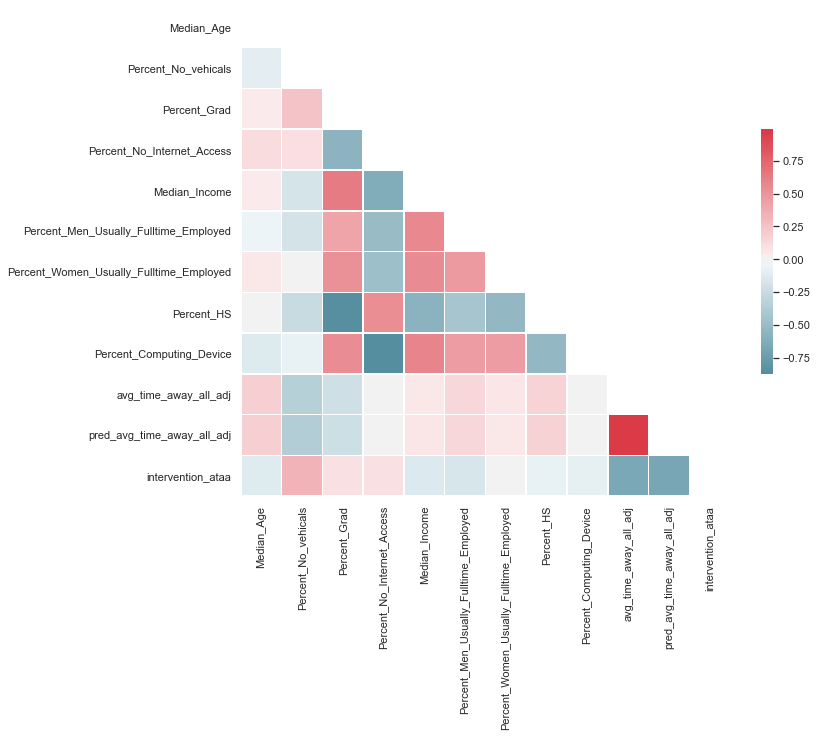

In [44]:
sns.set(style="white")

# Compute the correlation matrix
corr = df_import_ataa.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


1134


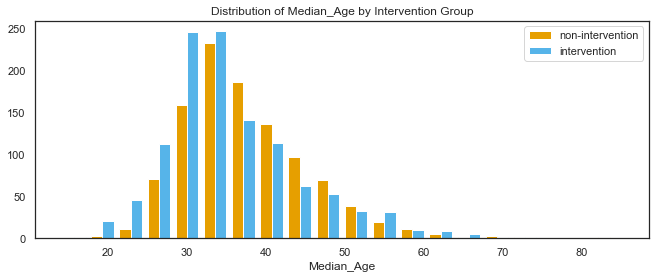

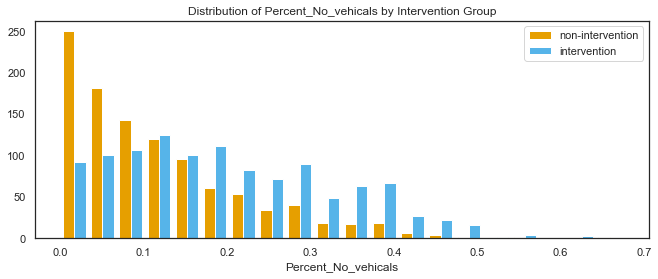

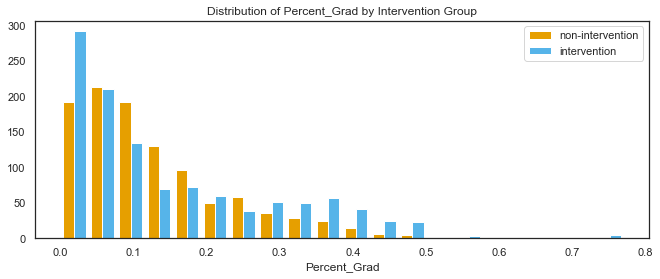

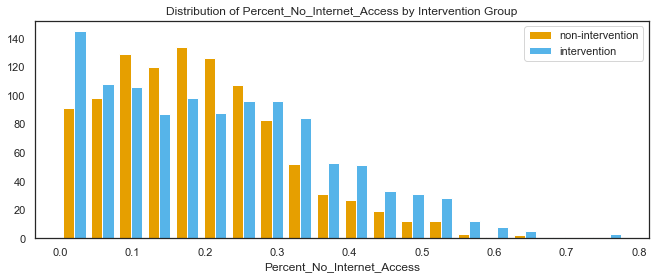

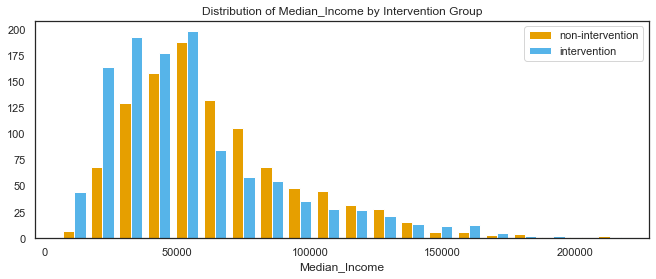

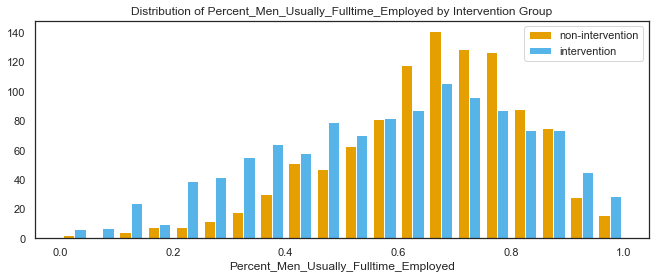

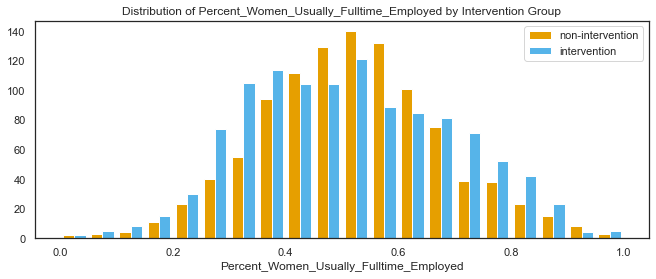

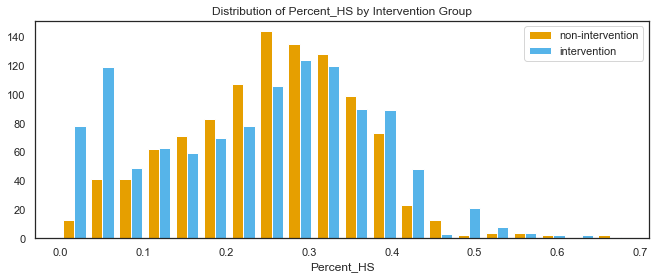

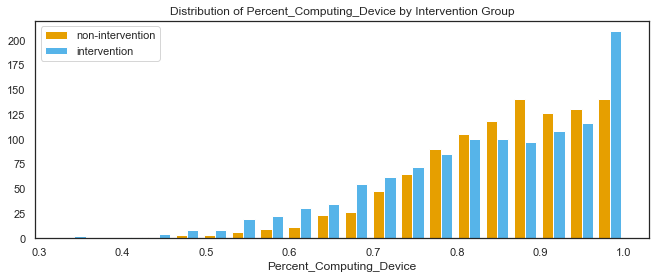

In [45]:
ct_intervention = len(df_import_ataa.loc[df_import_ataa['intervention_ataa']==1])
ct_nonintervention = len(df_import_ataa.loc[df_import_ataa['intervention_ataa']==0])
print(ct_intervention)

for col in import_cols_ataa[:9]:
    x1 = list(df_import_ataa.loc[df_import_ataa['intervention_ataa']==0, col])
    x2 = list(df_import_ataa.loc[df_import_ataa['intervention_ataa']==1, col])
    # Assign colors for each group and the names
    colors = ['#E69F00', '#56B4E9']
    names = ['non-intervention', 'intervention']

    plt.hist([x1,x2], bins = 20, color=colors, label=names)
    #plt.yscale('log')

    # Plot formatting
    plt.legend()
    plt.xlabel(col)
    #plt.ylabel('Normalized data')
    plt.title('Distribution of {} by Intervention Group'.format(col))
    plt.show()

#### For Reduction in Average Time Away from Home, the key features seem to be: 

median age - areas with a median age less than 33 or greater than 55 are more likely to be in the intervention group.

percent no vehicles - areas with greater than 18% having no vehicle are more likely to be in the intervention group.

percent grad - areas with greater than 30% having a graduate degree are more likely to be in the intervention group.

percent no internet access - areas with less than 7% or greater than 30% having no internet access are more likely to be in the intervention group.

median income - areas with median income of less than 50,000 or greater than 150,000 are more likely to be in the intervention group.

percent men usually full time employed - areas with less than 50% or greater than 90% men usually full time empoyed are more likely to be in the intervention group.

percent women usually full time employed - areas with less than 35% or greater than 70% women usually full time employed are more likely to be in the intervention group.

percent high shool - areas with less than 10% high school are more likely to be in the intervention group.

percent computing devices - areas with less than 75% or greater than 95% with access to computing devices are more likely to be in the intervention group.

